# Greedy Clique Algorithm

In [1]:
from CliqueGreedy import * # see python source file for implementation
import matplotlib.pyplot as plt

Generate some graphs and apply the greedy algorithm to it.

**Addition to the greedy algorithm described on slide 4-25 (as we consider it not completely correct):** check if given set of vertices actually is a clique. Counter example: "star". E.g. graph with edges (1,2), (2,3): Chooses vertex 2 at the beginning and stopps immediately as no vertices got removed. Returned "clique" actually is no clique as edge (1,3) is missing.

In [2]:
SIZE = 30

In [3]:
def test_some_for_r(r):
    a = []
    for size in range(1, SIZE+1):
        b = [0 for x in range(SIZE)]
        for clique_size in range(1, size+1):
            g = gen_random_graph_with_clique(size, clique_size, r)
            found_clique = get_clique(g)
            c_len = len(found_clique)
            
#            print(clique_size)
 #           print(g.edges," ", found_clique)
            
            # clique calculated by greedy algorithm must not contain more vertices than clique actually has
            assert c_len <= clique_size
            
            b[clique_size-1] = clique_size - c_len
        a.append(b)
    return a

### Heatmaps

Size of Clique can never be larger than size of graph. Color shows absolute difference of size of found clique and actual size of clique.


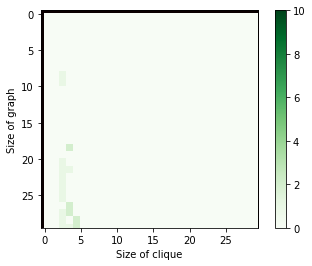

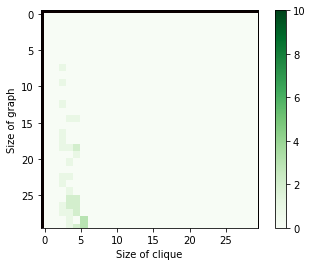

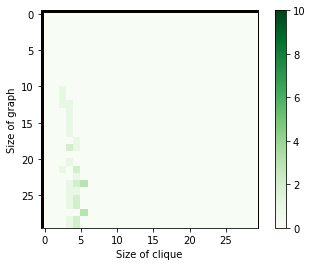

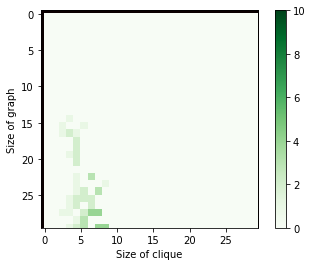

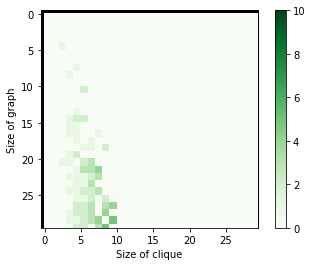

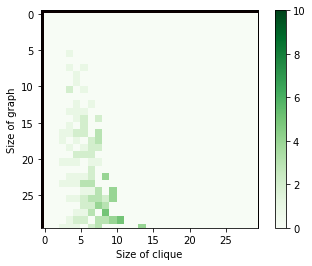

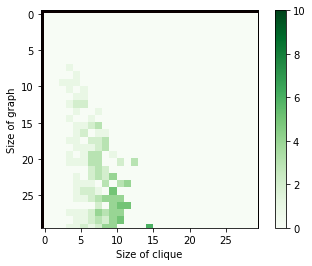

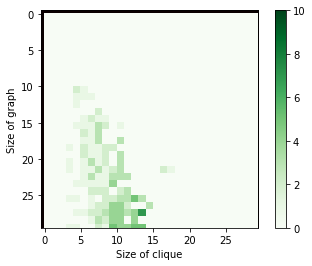

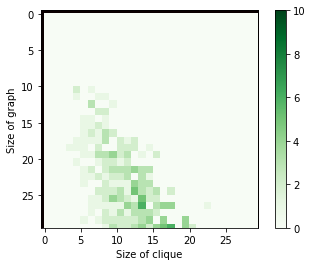

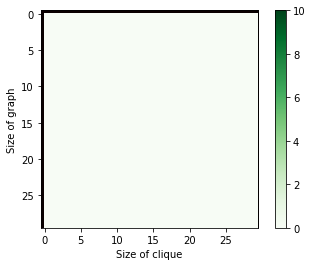

In [4]:
for i in range(1, 11):
    r = i / 10
    t = test_some_for_r(r)
    
    fig, axis = plt.subplots()
    heatmap = axis.pcolor(t, cmap=plt.cm.Greens, vmin=0, vmax=10)
    
    plt.imshow(t, cmap='hot', interpolation='nearest')
    plt.xlabel("Size of clique")
    plt.ylabel("Size of graph")
    plt.colorbar(heatmap)
    plt.show()

## Conclusion

It can be seen that on graphs with relatively few randomly inserted edges, the error (delta of clique size) is quite low. This could be due to the fact that the possibility that a vertex contained in the clique is connected to another vertex outside of the clique is relatively low. It is quite easy for the greedy algorithm to find the given clique.

As the probability that edges get added to the graph increases, the greedy algorithm is more likely to choose a vertex outside of the clique.

The last graph shows that the greedy algorithm does not make any mistakes when the probility that a edge is added is $1$. This is due to the fact that multiple cliques of size $k$ can be created (term ```degrees[vi] < clique_size - 1 or degrees[vj] < clique_size - 1```). This would be slightly different when the maximum size of another clique is $k-1$ (```degrees[vi] < clique_size - 2 or degrees[vj] < clique_size - 2```).